accuracy=  0.9642857142857143
benign
malignant
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        89
           4       0.91      1.00      0.95        51

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



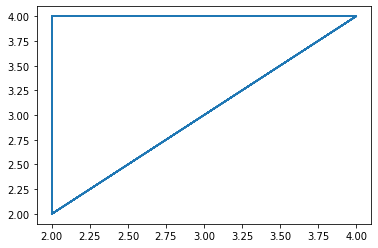

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 19 14:22:42 2020

@author: ShomerTheSec
"""

import numpy as np
from sklearn import preprocessing, model_selection, svm
import pandas as pd

#%%
df = pd.read_csv('breast-cancer-wisconsin.data')
diagnoses={2:'benign', 4:'malignant'} #2 for benign, 4 for malignant

df.replace('?',-99999, inplace=True) # to replace '?' values into -99999
df.drop(['sample_code'], 1, inplace=True) # to drop the first column as it's the id

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#%%
model = svm.SVC( C=3,
                    kernel='rbf',
                    gamma='auto',
                    shrinking=True,
                    probability=False,
                    tol=0.001,
                    cache_size=1000,
                    verbose=False,
                    max_iter=-1,
                    decision_function_shape='ovo')  
#%%
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('accuracy= ',accuracy)

#%% to save the model
import pickle
with open('SVM.pickle','wb') as f:
    pickle.dump(model, f)
    
#%% to load the model
pickle_in = open('SVM.pickle','rb')
model = pickle.load(pickle_in)


#%%
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[9,8,9,8,10,9,8,7,6]]) #to make prediction for more than one 
example_measures = example_measures.reshape(len(example_measures), -1) #can replace len.. with the number of predictions but that would be hard coded 
prediction = model.predict(example_measures)
for i in prediction:
      print(diagnoses[i])


#%%
from sklearn.metrics import confusion_matrix
import sklearn
y_predict = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
matrix=confusion_matrix(y_test, y_predict)
# true negative , false positive false negative ,, etc

#%%from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

from matplotlib.pyplot import plot
plot(y_test,y_predict)

In [ ]:
#%% to use grid search for deciding the params

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]} #decide the available params
#create a score variable to store the score we want f1
scorer = make_scorer(f1_score, pos_label=values)
# Create the object.
grid_obj = GridSearchCV(model, parameters)
# Fit the data
grid_fit = grid_obj.fit(X_train,y_train)

best_clf = grid_fit.best_estimator_

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(model, X, y, cv=cv)

array([0.94285714, 0.96666667, 0.95238095, 0.93809524, 0.95238095])